In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
file=pd.read_csv("/Users/gary/git/fio-tools/fio-iop-logs/random-rw-4-jobs_iops.1.log",names=["time","value","direction","d1","d2"])

In [4]:
file

,time,value,direction,d1,d2
0,1000,34614,0,0,0
1,1000,34659,1,0,0
2,2000,34561,0,0,0
3,2000,34126,1,0,0
4,3000,34707,0,0,0
...,...,...,...,...,...
115,58003,3182,1,0,0
116,59003,3248,0,0,0
117,59003,3348,1,0,0
118,60004,3334,0,0,0


In [5]:
reads=file[file.direction==0]
writes=file[file.direction==1]
reads=reads.set_index("time")
writes=writes.set_index("time")

In [6]:
print(reads[:5])
print(writes[:5])

      value  direction  d1  d2
time                          
1000  34614          0   0   0
2000  34561          0   0   0
3000  34707          0   0   0
4001  34342          0   0   0
5001  34678          0   0   0
      value  direction  d1  d2
time                          
1000  34659          1   0   0
2000  34126          1   0   0
3000  34920          1   0   0
4001  34739          1   0   0
5001  34252          1   0   0


In [29]:
rw=pd.DataFrame()
print(type(rw))
rw.insert(0,"reads",reads["value"])
rw.insert(1,"writes",writes["value"])
rw=rw.assign(total=rw.sum(axis=1))





<class 'pandas.core.frame.DataFrame'>


In [30]:
rw[:5]

,reads,writes,total
time,,,
1000,34614,34659,69273
2000,34561,34126,68687
3000,34707,34920,69627
4001,34342,34739,69081
5001,34678,34252,68930


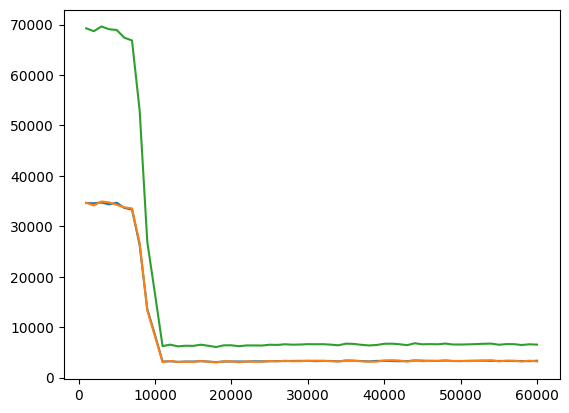

In [31]:
plt.plot(rw)